In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('train.csv')
meal = pd.read_csv('meal_info.csv')
center = pd.read_csv('center_info.csv')

In [3]:
data.head(5)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [4]:
meal.head(5)

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [5]:
center.head(5)

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [6]:
data.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [7]:
df = data.merge(center, on = 'center_id',how='left').merge(meal,on='meal_id',how='left')

In [8]:
df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,473,77,TYPE_A,4.5,Desert,Indian
456544,1062036,145,61,2304,482.09,482.09,0,0,42,473,77,TYPE_A,4.5,Desert,Indian
456545,1110849,145,61,2664,237.68,321.07,0,0,501,473,77,TYPE_A,4.5,Salad,Italian
456546,1147725,145,61,2569,243.50,313.34,0,0,729,473,77,TYPE_A,4.5,Salad,Italian


In [9]:
df.nunique()

id                       456548
week                        145
center_id                    77
meal_id                      51
checkout_price             1992
base_price                 1907
emailer_for_promotion         2
homepage_featured             2
num_orders                 1250
city_code                    51
region_code                   8
center_type                   3
op_area                      30
category                     14
cuisine                       4
dtype: int64

In [10]:
df.isna().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

In [11]:
df.drop_duplicates()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,473,77,TYPE_A,4.5,Desert,Indian
456544,1062036,145,61,2304,482.09,482.09,0,0,42,473,77,TYPE_A,4.5,Desert,Indian
456545,1110849,145,61,2664,237.68,321.07,0,0,501,473,77,TYPE_A,4.5,Salad,Italian
456546,1147725,145,61,2569,243.50,313.34,0,0,729,473,77,TYPE_A,4.5,Salad,Italian


In [12]:
sns.set_style("whitegrid", {"grid.color": ".9"})
sns.set(font_scale=1.5, palette="tab10")

# Visualizations

## Visualization of Center_type

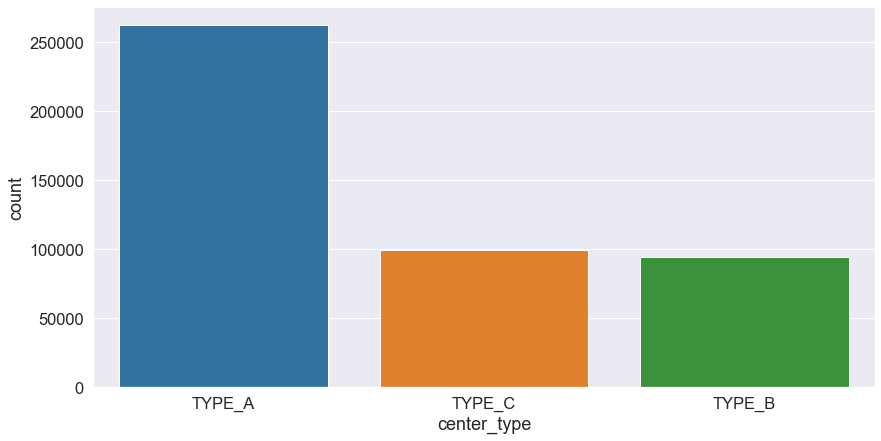

In [13]:
plt.figure(figsize=(14,7))
sns.countplot(df['center_type'],order=df['center_type'].value_counts().index)
plt.show()

Text(0, 0.5, 'Number of orders')

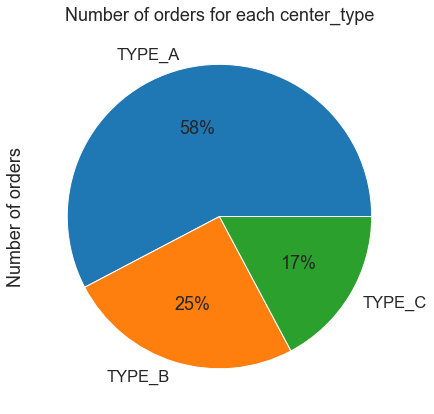

In [14]:
fig = plt.figure(figsize=(14,7))
df.groupby(['center_type'])['num_orders'].sum().sort_values(ascending=False).plot.pie(autopct='%.0f%%')
plt.title('Number of orders for each center_type')
plt.ylabel('Number of orders')

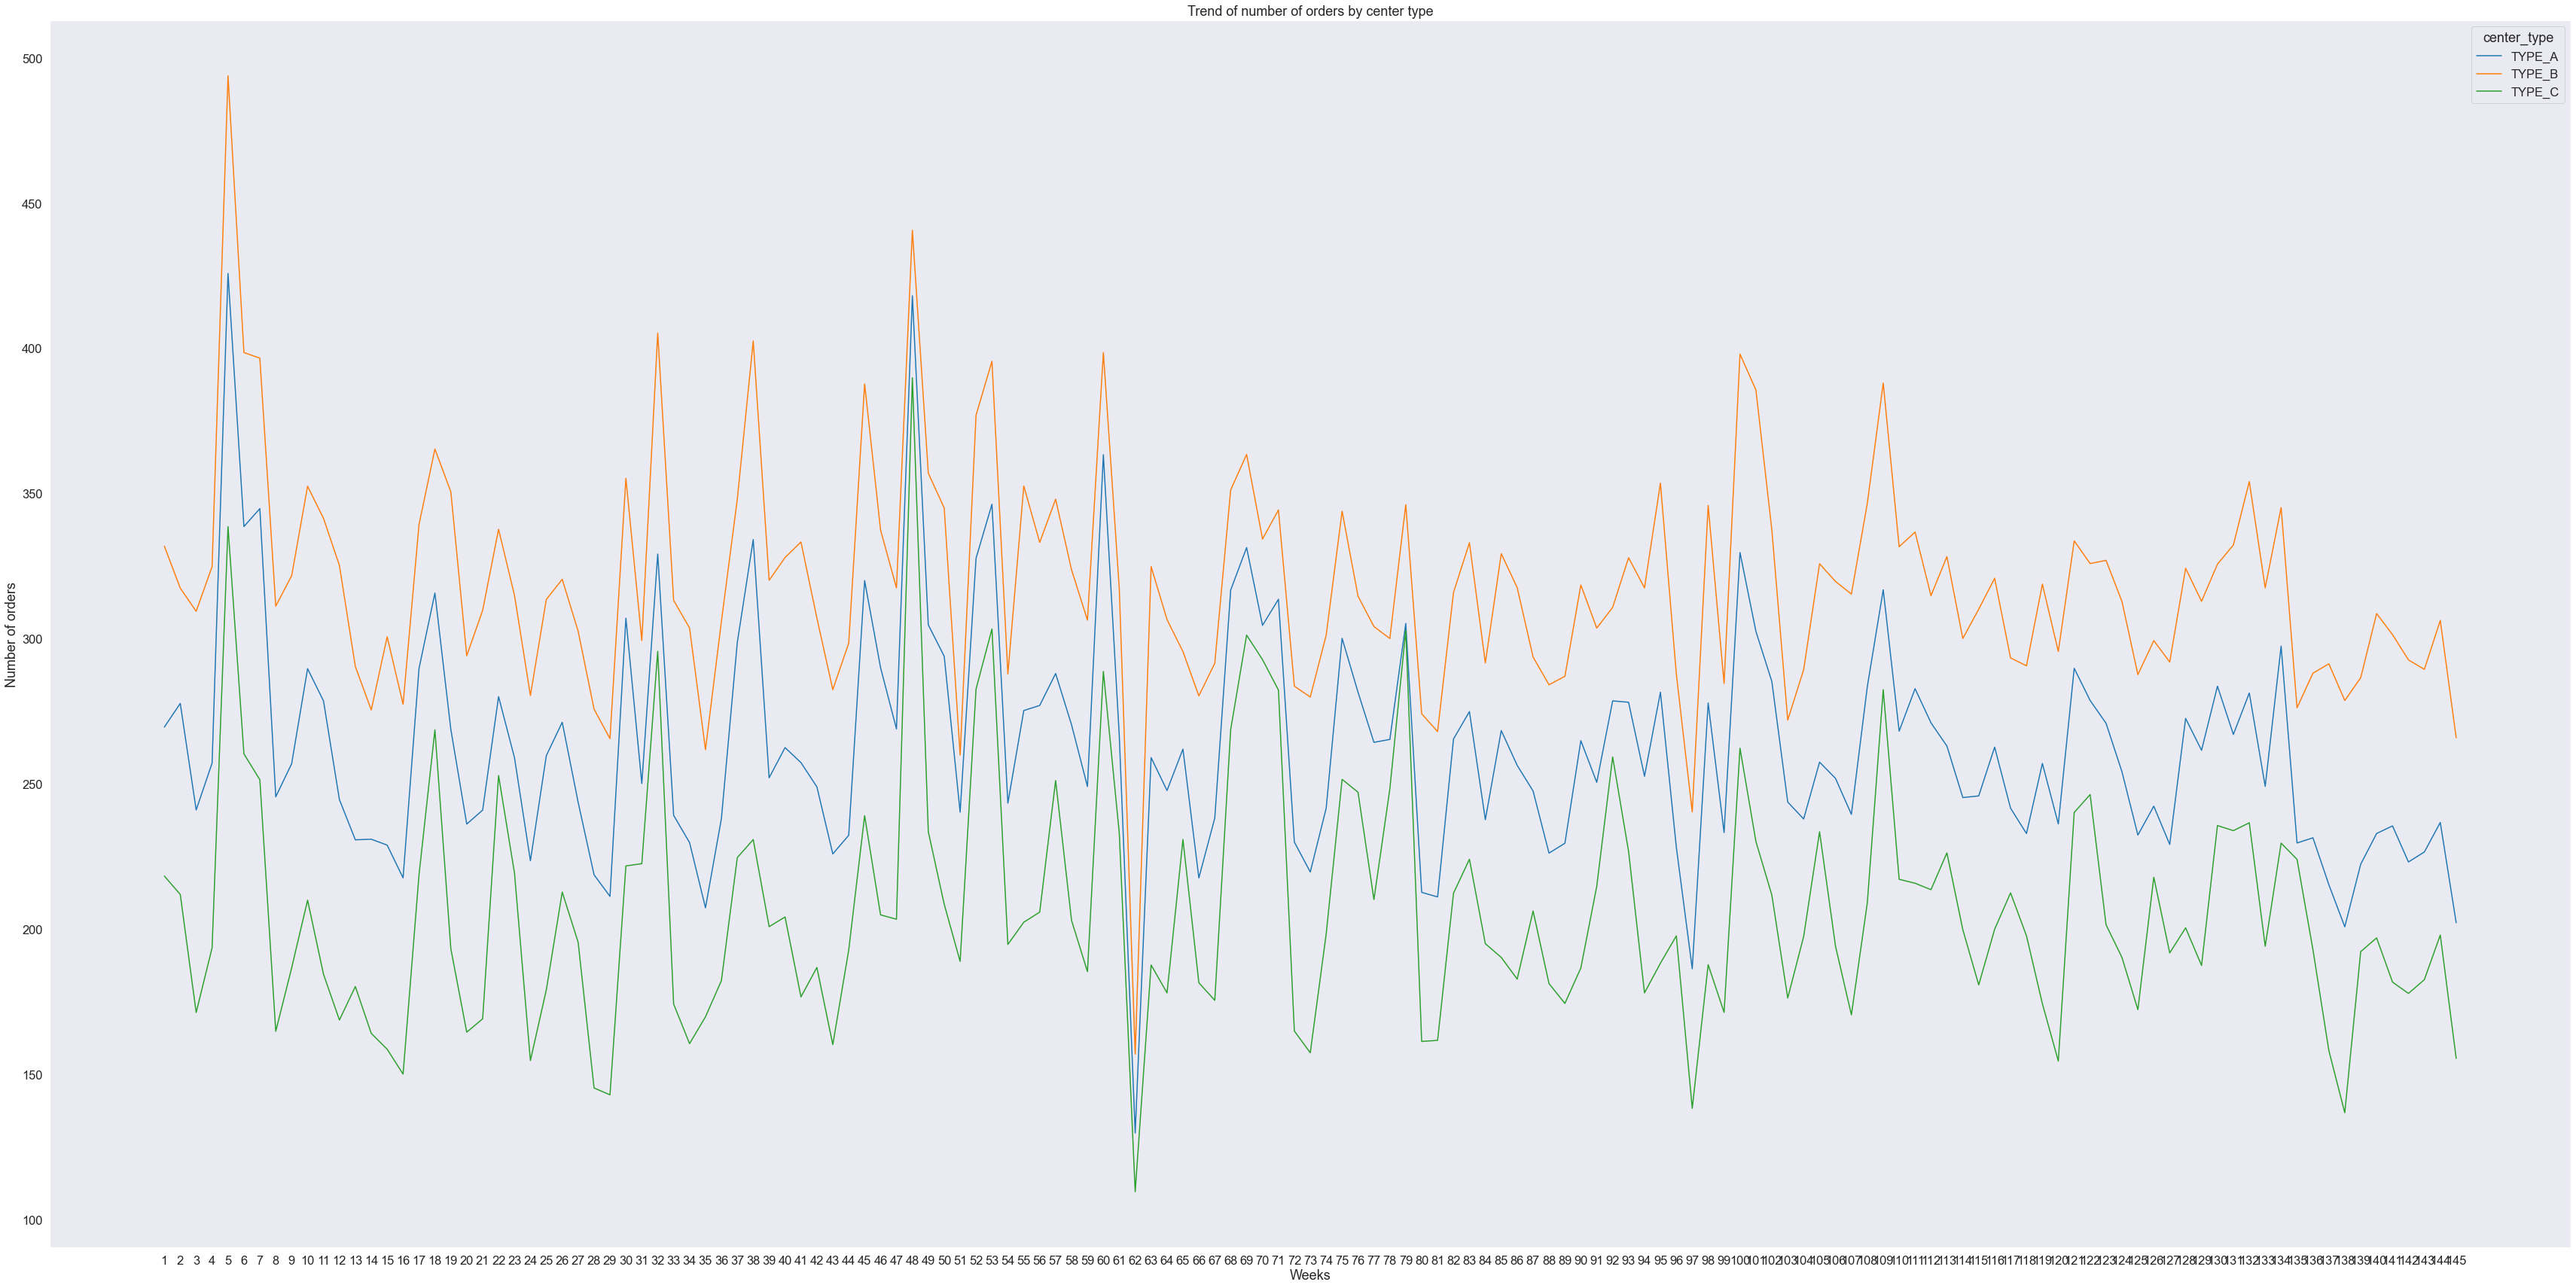

In [15]:
center_trend = df.pivot_table(index='week', columns='center_type', values='num_orders',aggfunc='mean')
center_trend.plot(figsize=(60,30))
plt.grid()
stick=np.arange(1,146,1)
plt.xticks(stick)
plt.title("Trend of number of orders by center type")
plt.xlabel("Weeks")
plt.ylabel("Number of orders")
plt.show()

## Visualization of Cuisine type

Text(0, 0.5, '')

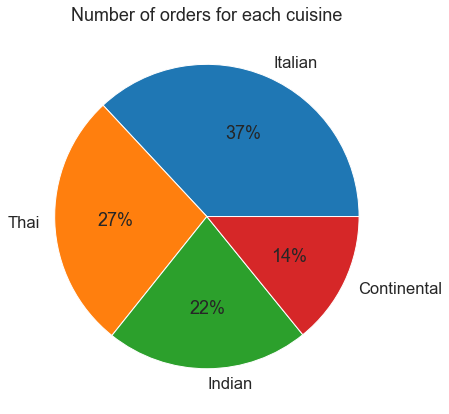

In [16]:
fig = plt.figure(figsize=(14,7))
df.groupby(['cuisine'])['num_orders'].sum().sort_values(ascending=False).plot.pie(autopct='%.0f%%')
plt.title('Number of orders for each cuisine')
plt.ylabel('')

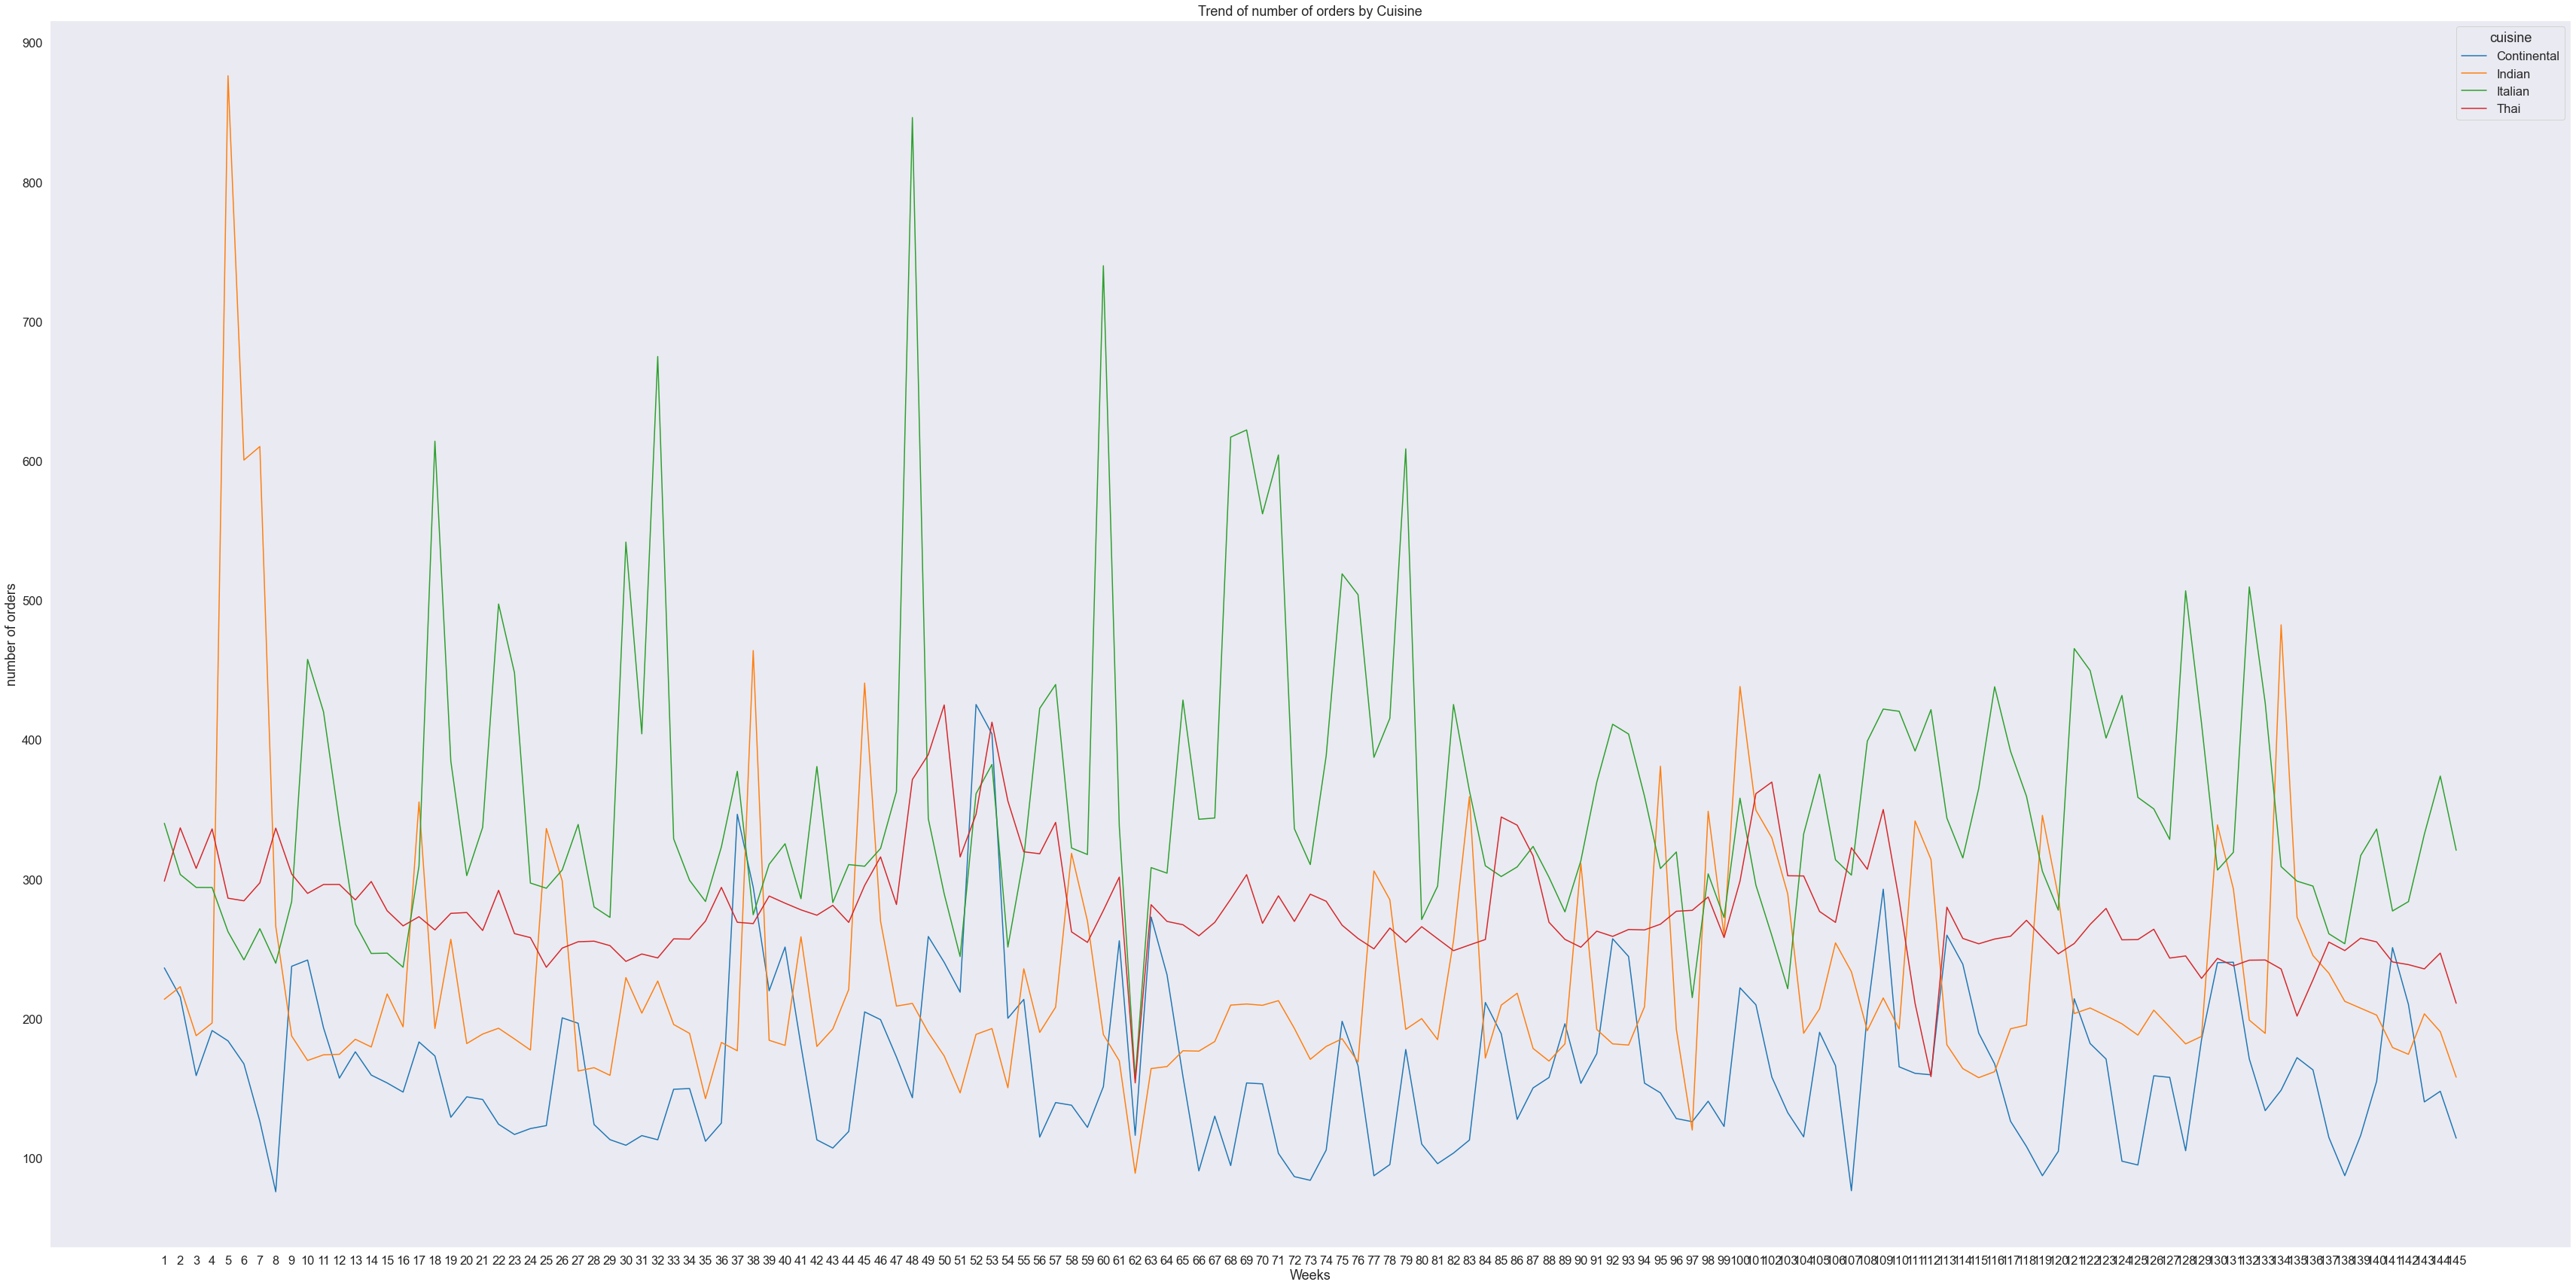

In [17]:
cuisine_trend = df.pivot_table(index='week', columns='cuisine', values='num_orders',aggfunc='mean')
cuisine_trend.plot(figsize=(60,30))
plt.grid()
plt.xticks(stick)
plt.title("Trend of number of orders by Cuisine")
plt.xlabel("Weeks")
plt.ylabel("number of orders")
plt.show()

## Visualization of Category type

Text(0, 0.5, 'Number of orders * 10^7')

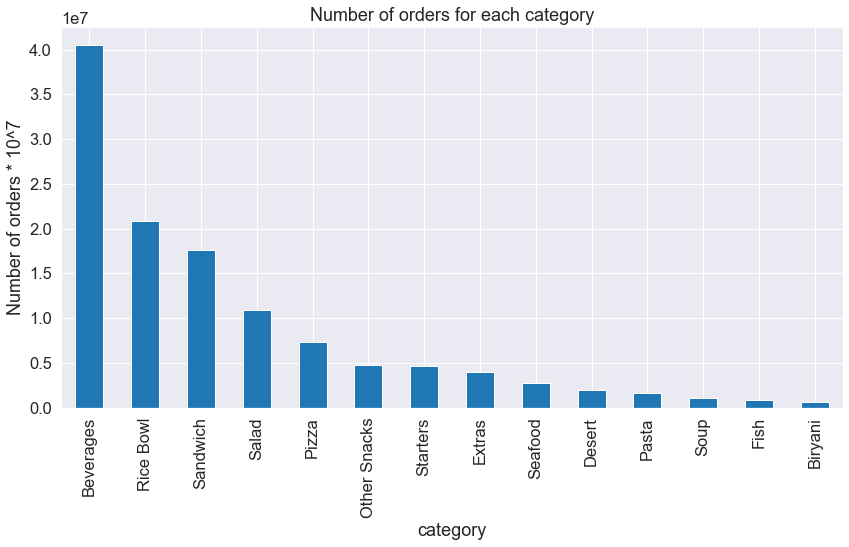

In [18]:
fig = plt.figure(figsize=(14,7))
df.groupby(['category'])['num_orders'].sum().sort_values(ascending=False).plot.bar()
plt.title('Number of orders for each category')
plt.ylabel('Number of orders * 10^7')

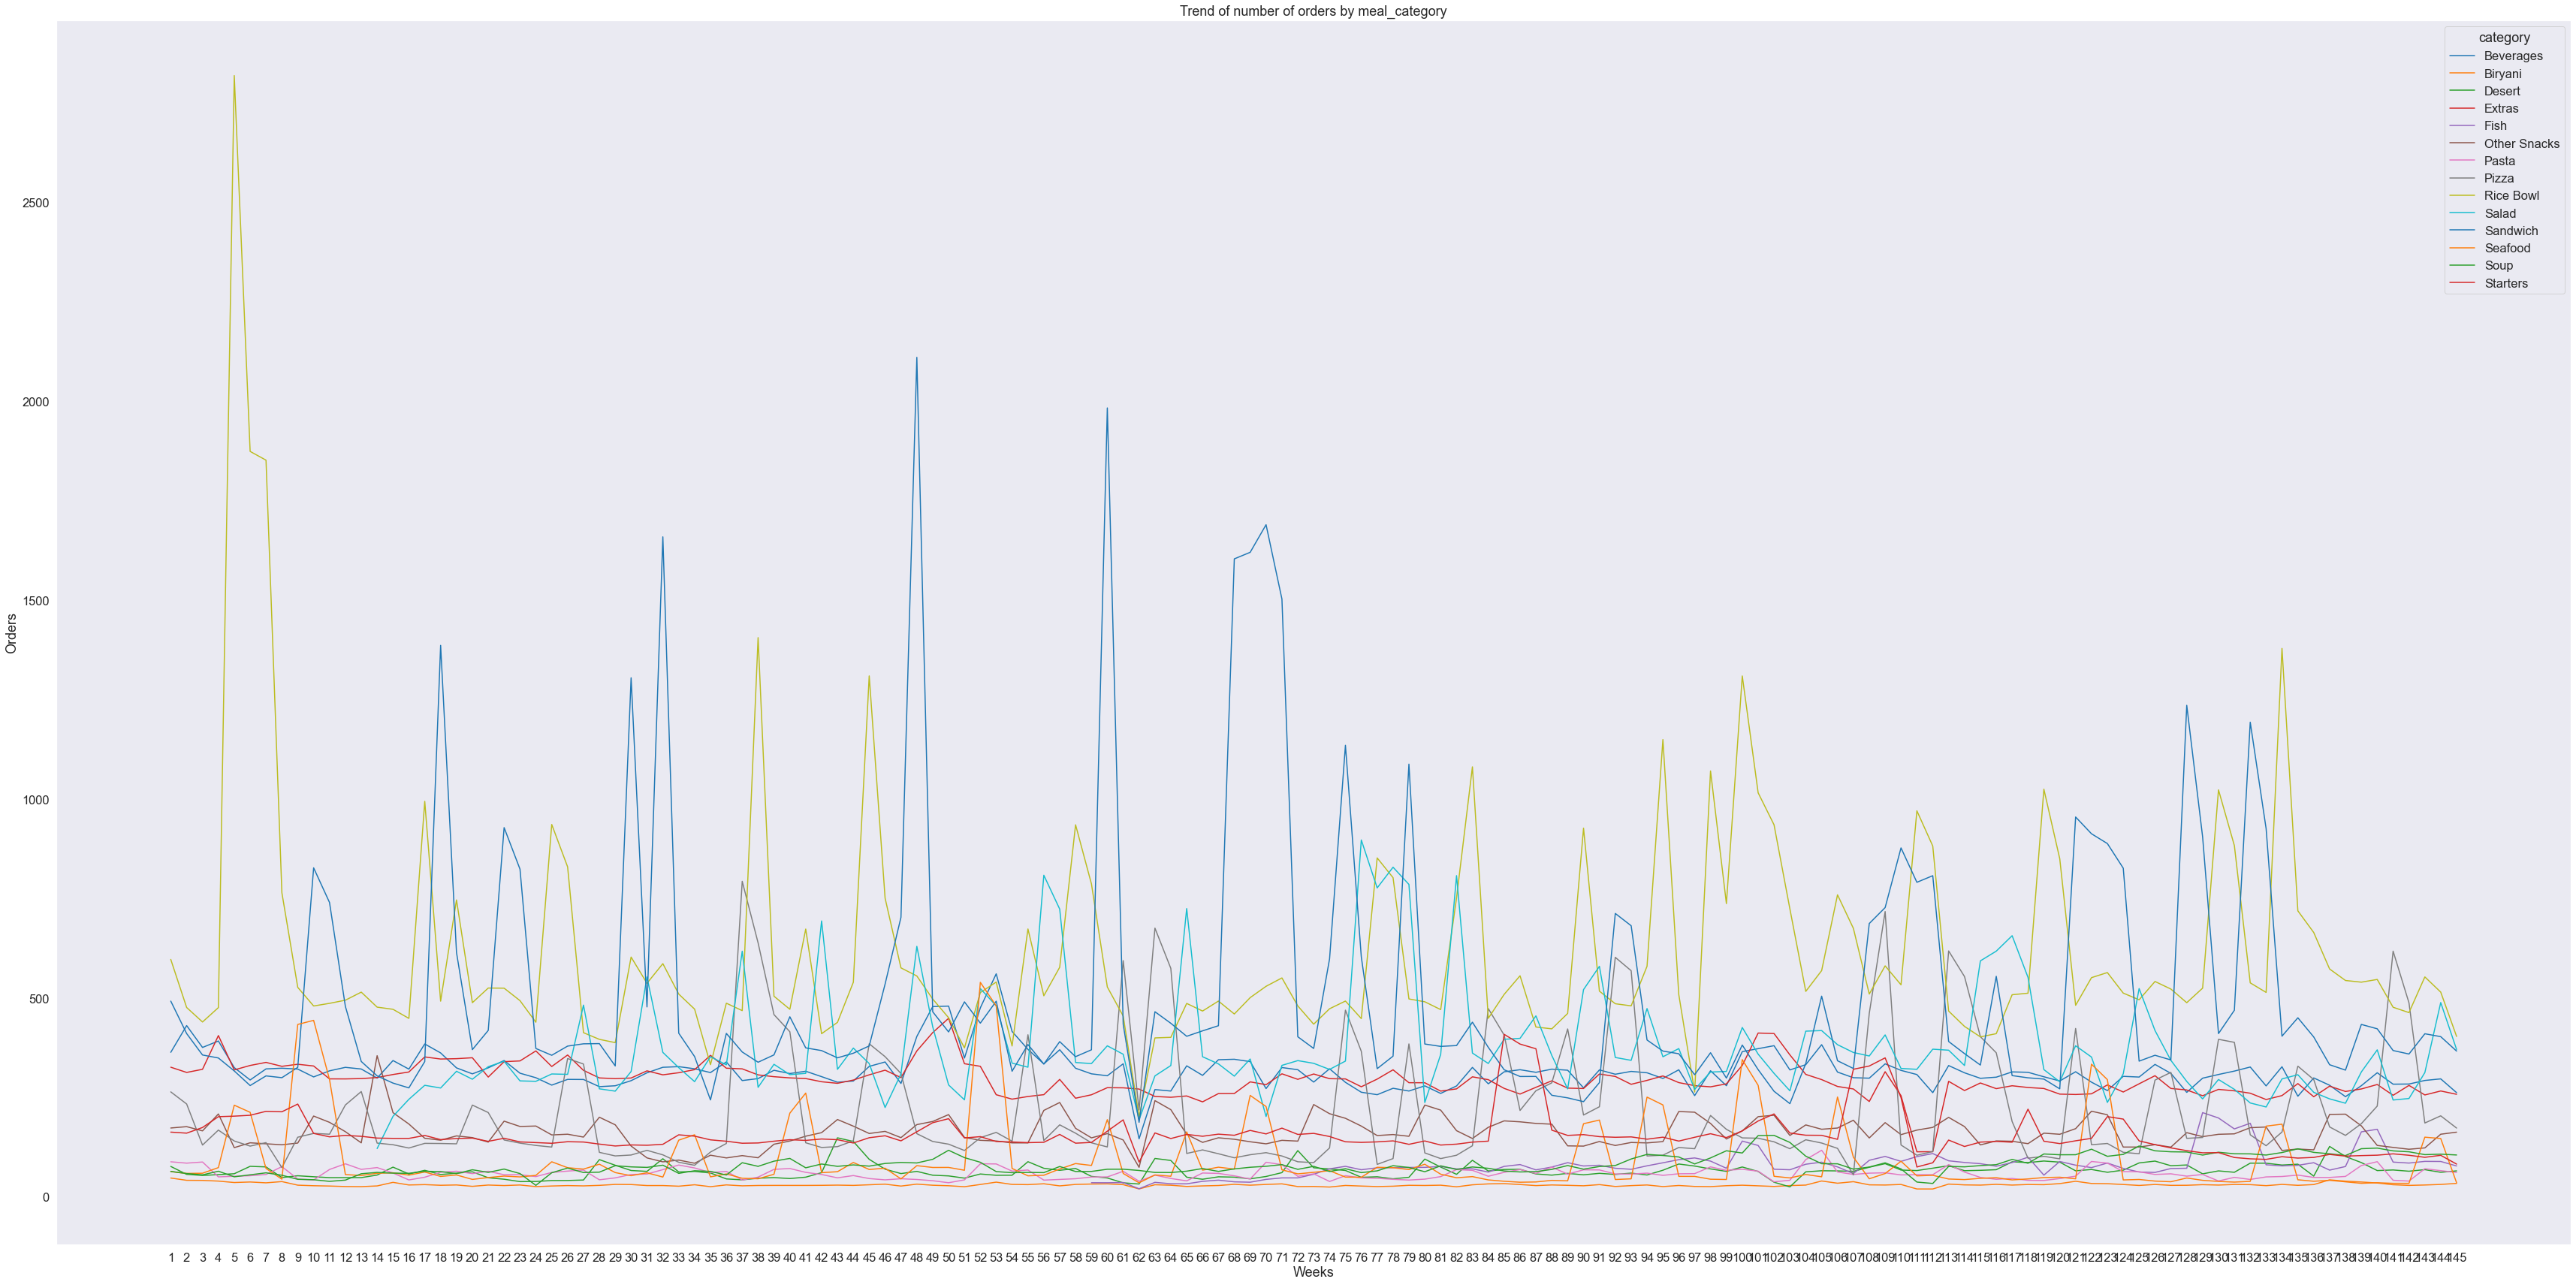

In [19]:
category_trend = df.pivot_table(index='week', columns='category', values='num_orders', aggfunc='mean')
category_trend.plot(figsize=(60,30))
plt.grid()
stick=np.arange(1,146,1)
plt.xticks(stick)
plt.title("Trend of number of orders by meal_category")
plt.xlabel("Weeks")
plt.ylabel("Orders")
plt.show()

## Visualization of region_code

Text(0, 0.5, 'Number of orders * 10^7')

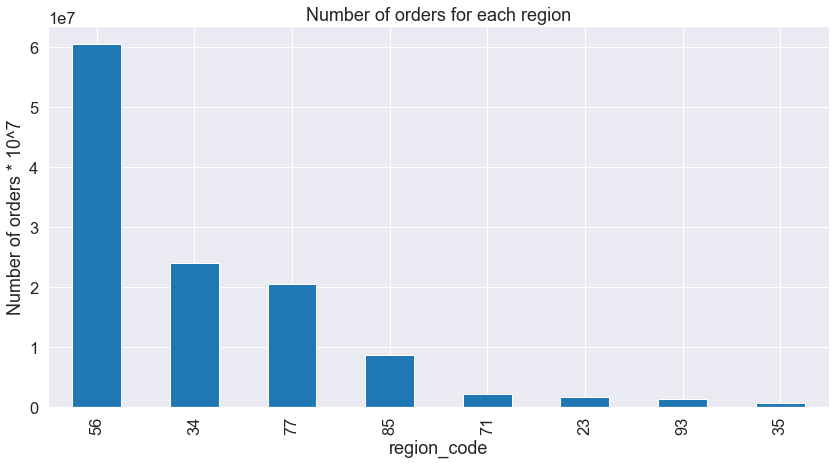

In [20]:
fig = plt.figure(figsize=(14,7))
df.groupby(['region_code'])['num_orders'].sum().sort_values(ascending=False).plot.bar()
plt.title('Number of orders for each region')
plt.ylabel('Number of orders * 10^7')

## Visualization of city_code

Text(0, 0.5, 'Number of orders * 10^7')

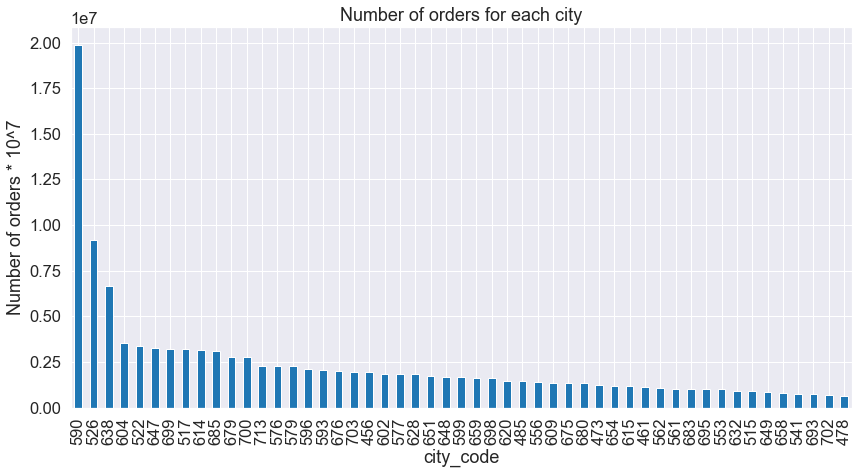

In [21]:
fig = plt.figure(figsize=(14,7))
df.groupby(['city_code'])['num_orders'].sum().sort_values(ascending=False).plot.bar()
plt.title('Number of orders for each city')
plt.ylabel('Number of orders * 10^7')

## Visualization of op_area

<AxesSubplot:xlabel='op_area', ylabel='num_orders'>

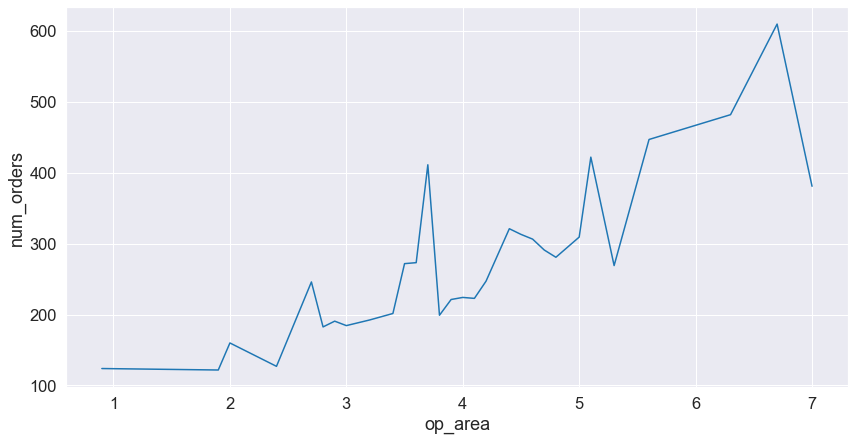

In [22]:
fig = plt.figure(figsize=(14,7)) 
sns.lineplot(data=df, x='op_area', y='num_orders',ci=None)

## Visualization of checkout_price and base_price with outlier filtration 

In [23]:
#Lets check and filter the outliers to calculate the average number of orders price range. 
print('Checkout_price max - ',df['checkout_price'].max(), '\nCheckout_price min - ', df['checkout_price'].min())
print('base_price max - ',df['base_price'].max(), '\nbase_price min - ', df['base_price'].min())

Checkout_price max -  866.27 
Checkout_price min -  2.97
base_price max -  866.27 
base_price min -  55.35


In [24]:
df2 = df[['checkout_price','base_price']]
df2

,checkout_price,base_price
0,136.83,152.29
1,136.83,135.83
2,134.86,135.86
3,339.50,437.53
4,243.50,242.50
...,...,...
456543,484.09,484.09
456544,482.09,482.09
456545,237.68,321.07
456546,243.50,313.34


In [25]:
def outlier(x):
        mu = x.mean()
        sigma = x.std()
        LL = mu - 2*sigma # Lower limit 
        UL = mu + 2*sigma # Upper limit
        out = (LL > x) | (x > UL)
        return(out) # check outliers in each variable
print(df2.apply(outlier).apply(sum))

checkout_price    26621
base_price        19368
dtype: int64


In [26]:
def outlier_filtration(x):
    mu = np.average(x)
    sigma = np.std(x)
    LL = mu - 2*sigma # Lower limit 
    UL = mu + 2*sigma # Upper limit
    xnew = x
    xnew = np.where((LL>x),LL,(np.where((x>UL),UL,x)))
    return(xnew)

df2 = df2.apply(outlier_filtration) # Create new data with inputed values

In [27]:
df['base_price'] = df2['base_price']
df['checkout_price'] = df2['checkout_price']
df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,473,77,TYPE_A,4.5,Desert,Indian
456544,1062036,145,61,2304,482.09,482.09,0,0,42,473,77,TYPE_A,4.5,Desert,Indian
456545,1110849,145,61,2664,237.68,321.07,0,0,501,473,77,TYPE_A,4.5,Salad,Italian
456546,1147725,145,61,2569,243.50,313.34,0,0,729,473,77,TYPE_A,4.5,Salad,Italian


In [28]:
df.to_csv('Demand_forecasting.csv', index=False)

#### Visualizations part in tableau

## Visualization of discounts 

In [29]:
#df['discount']=((df['base_price']-df['checkout_price'])*100/df['base_price'])
#df[df['discount']<0]=0
#df['discount']=round(df['discount'],1)

In [30]:
# #plt.figure(figsize=(14,7))
# #sns.scatterplot(x='discount',y='num_orders',data=df, ci=None)
# plt.title('Discount Vs Number of orders')
# plt.xlabel("Discount")
# plt.ylabel("Number of orders")

## Visualization of promotional_emails

<AxesSubplot:xlabel='emailer_for_promotion', ylabel='count'>

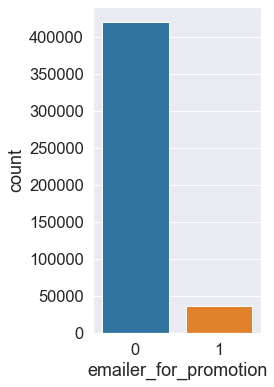

In [31]:
fig =plt.figure(figsize=(3,6))
sns.countplot(data = df, x='emailer_for_promotion')

In [32]:
promotion_applied=[1]
no_promotion = [0]
df_promotion=df.loc[df['emailer_for_promotion'].isin(promotion_applied)]
df_no_promotion=df.loc[df['emailer_for_promotion'].isin(no_promotion)]
print('Promotion voucher meals count:',df_promotion['meal_id'].count())
print('No Promotion meals count:',df_no_promotion['meal_id'].count())

Promotion voucher meals count: 37050
No Promotion meals count: 419498


<AxesSubplot:xlabel='week', ylabel='num_orders'>

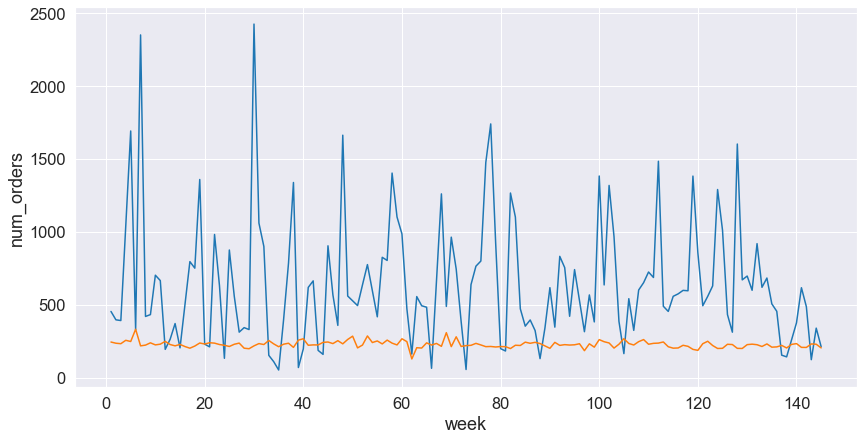

In [33]:
fig = plt.figure(figsize=(14,7)) 
sns.lineplot(data = df_promotion, x="week", y="num_orders", ci=None)
sns.lineplot(data = df_no_promotion, x="week", y="num_orders", ci=None)

## Visualization of home_page featuring

<AxesSubplot:xlabel='homepage_featured', ylabel='count'>

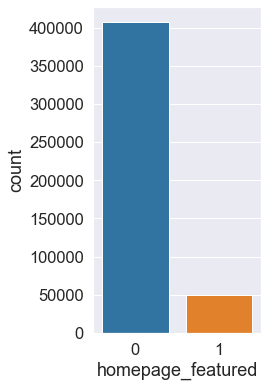

In [34]:
fig = plt.figure(figsize=(3,6))
sns.countplot(data = df, x='homepage_featured')

## Visualization of number of orders

<AxesSubplot:xlabel='week'>

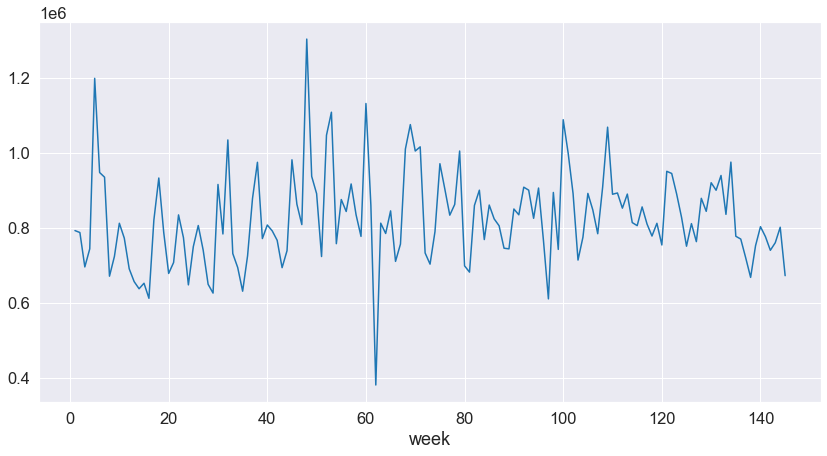

In [35]:
fig = plt.figure(figsize=(14,7))
df.groupby('week').sum()['num_orders'].plot()

## Analyzing the peaks and drops of the trend in number of orders

Text(0, 0.5, '')

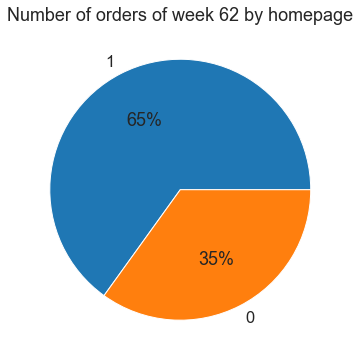

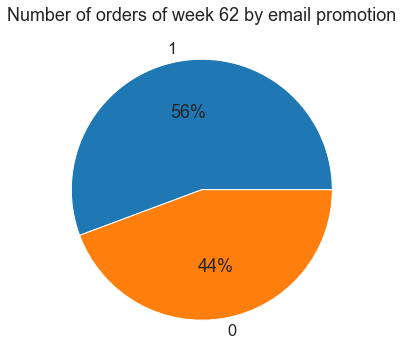

In [36]:
week_62 = df[df['week'] == 62]
week_62.emailer_for_promotion.value_counts()
fig=plt.figure(figsize=(16,6))
week_62.groupby(["homepage_featured"])["num_orders"].mean().sort_values(ascending=False).plot.pie(autopct='%1.0f%%')
plt.title("Number of orders of week 62 by homepage")
plt.ylabel('')
fig=plt.figure(figsize=(16,6))
week_62.groupby(["emailer_for_promotion"])["num_orders"].mean().sort_values(ascending=False).plot.pie(autopct='%1.0f%%')
plt.title("Number of orders of week 62 by email promotion")
plt.ylabel('')

Text(0, 0.5, '')

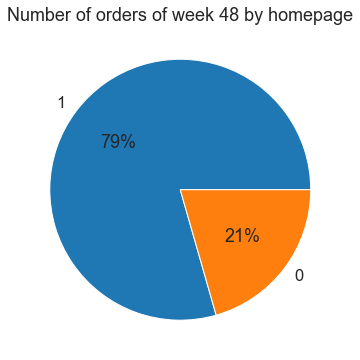

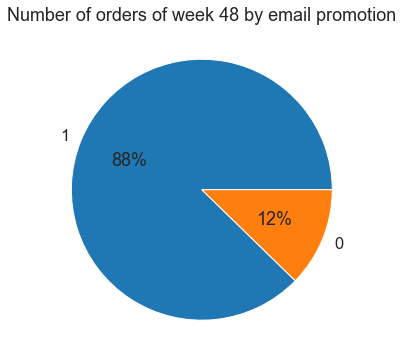

In [37]:
week_48 = df[df['week'] == 48]
week_48.emailer_for_promotion.value_counts()
fig=plt.figure(figsize=(16,6))
week_48.groupby(["homepage_featured"])["num_orders"].mean().sort_values(ascending=False).plot.pie(autopct='%1.0f%%')
plt.title("Number of orders of week 48 by homepage")
plt.ylabel('')
fig=plt.figure(figsize=(16,6))
week_48.groupby(["emailer_for_promotion"])["num_orders"].mean().sort_values(ascending=False).plot.pie(autopct='%1.0f%%')
plt.title("Number of orders of week 48 by email promotion")
plt.ylabel('')

Text(0, 0.5, '')

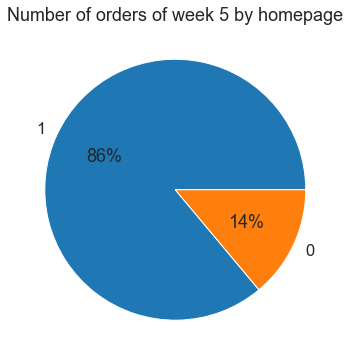

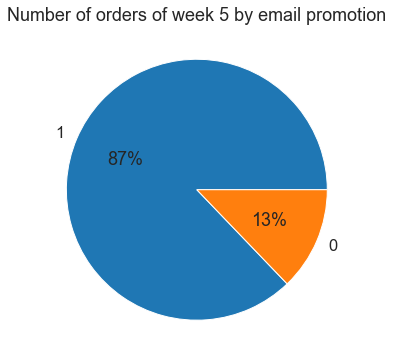

In [38]:
week_5 = df[df['week'] == 5]
week_5.emailer_for_promotion.value_counts()
fig=plt.figure(figsize=(16,6))
week_5.groupby(["homepage_featured"])["num_orders"].mean().sort_values(ascending=False).plot.pie(autopct='%1.0f%%')
plt.title("Number of orders of week 5 by homepage")
plt.ylabel('')
fig=plt.figure(figsize=(16,6))
week_5.groupby(["emailer_for_promotion"])["num_orders"].mean().sort_values(ascending=False).plot.pie(autopct='%1.0f%%')
plt.title("Number of orders of week 5 by email promotion")
plt.ylabel('')

## Stationarity Test

In [39]:
from statsmodels.tsa.stattools import adfuller
series = df.groupby('week').sum()['num_orders']
# ADF Test
result = adfuller(series, autolag='AIC')

print('ADF Statistic: %f' % result[0])

print('p-value: %f' % result[1])
print('Critical Values: ')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject Hypothesis - Time Series for number of orders is Stationary")
else:
    print ("Failed to Reject Hypothesis - Time Series for number of orders is Non-Stationary")

ADF Statistic: -2.542866
p-value: 0.105390
Critical Values: 
	1%: -3.480
	5%: -2.883
	10%: -2.578
Failed to Reject Hypothesis - Time Series for number of orders is Non-Stationary


In [40]:
df = df.sort_values(by = ['center_id','meal_id','week'],ascending=True)
df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
2370,1436842,1,10,1062,181.39,181.39,0,0,865,590,56,TYPE_B,6.3,Beverages,Italian
5273,1205013,2,10,1062,183.36,182.36,0,0,782,590,56,TYPE_B,6.3,Beverages,Italian
8175,1447751,3,10,1062,184.36,182.36,0,0,851,590,56,TYPE_B,6.3,Beverages,Italian
11064,1014968,4,10,1062,182.36,183.36,0,0,1202,590,56,TYPE_B,6.3,Beverages,Italian
13918,1003563,5,10,1062,183.39,181.39,0,0,958,590,56,TYPE_B,6.3,Beverages,Italian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345410,1255251,112,186,2956,583.03,581.03,0,0,82,649,34,TYPE_A,3.4,Fish,Continental
348601,1436164,113,186,2956,583.03,582.03,0,0,40,649,34,TYPE_A,3.4,Fish,Continental
351905,1000576,114,186,2956,583.03,581.03,0,0,27,649,34,TYPE_A,3.4,Fish,Continental
355206,1429037,115,186,2956,581.03,583.03,0,0,15,649,34,TYPE_A,3.4,Fish,Continental


In [41]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# vif = [variance_inflation_factor(df.values, i)
#                           for i in range(len(df.columns))]
# print(df.columns)
# print(vif)

In [42]:
# X_train2 = X_train
# while (max(vif) > 5):    
#     indx = vif.index(max(vif)) #Get the index of variable with highest VIF
#     X_train2 = X_train2.drop(X_train2.columns[indx],axis = 1)#Drop variable if the highest VIF is greater than 5
#     vif = [variance_inflation_factor(X_train2.values, i)
#                           for i in range(len(X_train2.columns))]

<AxesSubplot:>

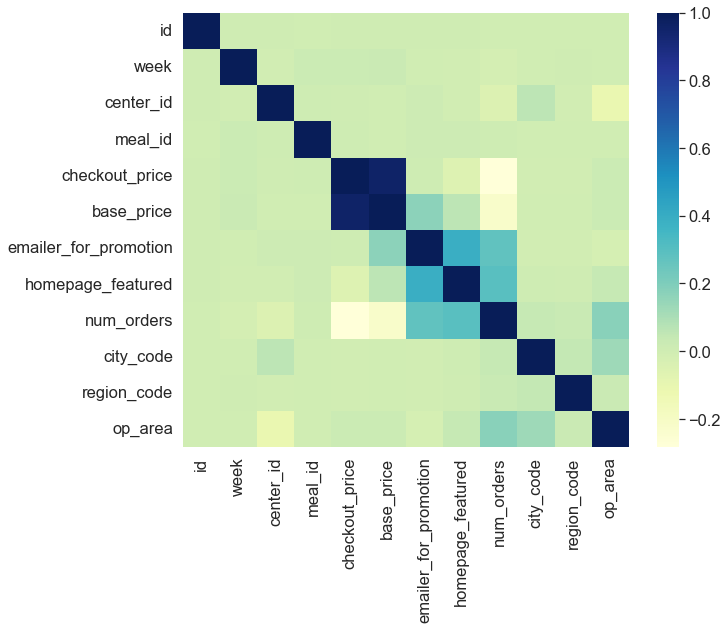

In [43]:
import seaborn as sns
plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(),cmap="YlGnBu") 

In [44]:
df['discount']=df['checkout_price']-df['base_price']

In [45]:
df['discount percent']=(df['checkout_price']-df['base_price'])/data['base_price']*100

<AxesSubplot:>

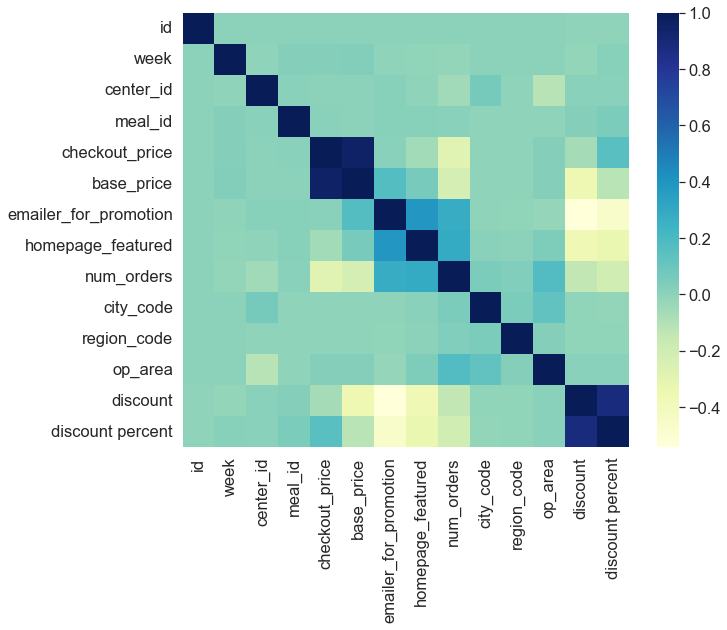

In [46]:
import seaborn as sns
plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(),cmap="YlGnBu") 

In [47]:
df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount,discount percent
2370,1436842,1,10,1062,181.39,181.39,0,0,865,590,56,TYPE_B,6.3,Beverages,Italian,0.0,0.000000
5273,1205013,2,10,1062,183.36,182.36,0,0,782,590,56,TYPE_B,6.3,Beverages,Italian,1.0,0.548366
8175,1447751,3,10,1062,184.36,182.36,0,0,851,590,56,TYPE_B,6.3,Beverages,Italian,2.0,1.096732
11064,1014968,4,10,1062,182.36,183.36,0,0,1202,590,56,TYPE_B,6.3,Beverages,Italian,-1.0,-0.545375
13918,1003563,5,10,1062,183.39,181.39,0,0,958,590,56,TYPE_B,6.3,Beverages,Italian,2.0,1.102597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345410,1255251,112,186,2956,583.03,581.03,0,0,82,649,34,TYPE_A,3.4,Fish,Continental,2.0,0.344216
348601,1436164,113,186,2956,583.03,582.03,0,0,40,649,34,TYPE_A,3.4,Fish,Continental,1.0,0.171812
351905,1000576,114,186,2956,583.03,581.03,0,0,27,649,34,TYPE_A,3.4,Fish,Continental,2.0,0.344216
355206,1429037,115,186,2956,581.03,583.03,0,0,15,649,34,TYPE_A,3.4,Fish,Continental,-2.0,-0.343036


In [48]:
df.corr()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,discount,discount percent
id,1.000000,0.002225,0.002641,0.000488,0.001957,0.002845,0.002001,0.003111,0.000702,-0.000387,-0.000648,-0.000090,-0.003413,-0.002824
week,0.002225,1.000000,-0.003450,0.019814,0.020472,0.023629,-0.000841,-0.008263,-0.017210,0.000405,0.004600,0.001550,-0.015063,0.015530
center_id,0.002641,-0.003450,1.000000,0.009893,0.001879,0.000081,0.013658,-0.005043,-0.053035,0.061078,-0.003426,-0.111869,0.005641,0.007409
meal_id,0.000488,0.019814,0.009893,1.000000,0.007772,0.000713,0.013402,0.016354,0.010597,-0.003198,-0.001662,-0.001546,0.022069,0.043914
checkout_price,0.001957,0.020472,0.001879,0.007772,1.000000,0.955027,0.009143,-0.055434,-0.284293,-0.005395,-0.004166,0.021478,-0.065630,0.154190
base_price,0.002845,0.023629,0.000081,0.000713,0.955027,1.000000,0.169963,0.056886,-0.222833,-0.001790,-0.001661,0.018430,-0.358559,-0.118380
emailer_for_promotion,0.002001,-0.000841,0.013658,0.013402,0.009143,0.169963,1.000000,0.390534,0.277147,-0.005234,-0.007462,-0.019462,-0.543174,-0.468925
homepage_featured,0.003111,-0.008263,-0.005043,0.016354,-0.055434,0.056886,0.390534,1.000000,0.294490,0.008640,0.003605,0.041498,-0.365950,-0.333731
num_orders,0.000702,-0.017210,-0.053035,0.010597,-0.284293,-0.222833,0.277147,0.294490,1.000000,0.041596,0.029744,0.176976,-0.145141,-0.200395
city_code,-0.000387,0.000405,0.061078,-0.003198,-0.005395,-0.001790,-0.005234,0.008640,0.041596,1.000000,0.042686,0.131476,-0.010959,-0.013364


In [49]:
# def meal_id(meal_id, datacol):        
#     meal_id_val_index_n = []
#     for i in datacol:
#         if i >= 100 and i <= 200:
#             meal_id_val_index_n.append(1)
#         elif i >= 201 and i <=300:
#             meal_id_val_index_n.append(2)
#         elif i >= 301 and i <=400:
#             meal_id_val_index_n.append(3)  
#         elif i >= 401 and i <=500:
#             meal_id_val_index_n.append(4)
#         elif i >= 501 and i <=600:
#             meal_id_val_index_n.append(5)          
#         else:
#             meal_id_val_index_n.append(6) 
#     return  meal_id_val_index_n

# meal_id_val_index_n = meal_id(df.meal_id, df.checkout_price)
# df.meal_id = meal_id_val_index_n

In [50]:
df.corr()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,discount,discount percent
id,1.000000,0.002225,0.002641,0.000488,0.001957,0.002845,0.002001,0.003111,0.000702,-0.000387,-0.000648,-0.000090,-0.003413,-0.002824
week,0.002225,1.000000,-0.003450,0.019814,0.020472,0.023629,-0.000841,-0.008263,-0.017210,0.000405,0.004600,0.001550,-0.015063,0.015530
center_id,0.002641,-0.003450,1.000000,0.009893,0.001879,0.000081,0.013658,-0.005043,-0.053035,0.061078,-0.003426,-0.111869,0.005641,0.007409
meal_id,0.000488,0.019814,0.009893,1.000000,0.007772,0.000713,0.013402,0.016354,0.010597,-0.003198,-0.001662,-0.001546,0.022069,0.043914
checkout_price,0.001957,0.020472,0.001879,0.007772,1.000000,0.955027,0.009143,-0.055434,-0.284293,-0.005395,-0.004166,0.021478,-0.065630,0.154190
base_price,0.002845,0.023629,0.000081,0.000713,0.955027,1.000000,0.169963,0.056886,-0.222833,-0.001790,-0.001661,0.018430,-0.358559,-0.118380
emailer_for_promotion,0.002001,-0.000841,0.013658,0.013402,0.009143,0.169963,1.000000,0.390534,0.277147,-0.005234,-0.007462,-0.019462,-0.543174,-0.468925
homepage_featured,0.003111,-0.008263,-0.005043,0.016354,-0.055434,0.056886,0.390534,1.000000,0.294490,0.008640,0.003605,0.041498,-0.365950,-0.333731
num_orders,0.000702,-0.017210,-0.053035,0.010597,-0.284293,-0.222833,0.277147,0.294490,1.000000,0.041596,0.029744,0.176976,-0.145141,-0.200395
city_code,-0.000387,0.000405,0.061078,-0.003198,-0.005395,-0.001790,-0.005234,0.008640,0.041596,1.000000,0.042686,0.131476,-0.010959,-0.013364


In [51]:
def center_id(center_id, datacol):        
    center_id_val_index_n = []
    for i in datacol:
        if i >= 0 and i <= 2:
            center_id_val_index_n.append(1)
        elif i > 2 and i <=3:
            center_id_val_index_n.append(2)
        elif i > 3 and i <=4:
            center_id_val_index_n.append(3)  
        elif i >4 and i <=5:
            center_id_val_index_n.append(4)
        elif i > 5 and i <=6:
            center_id_val_index_n.append(5)          
        else:
            center_id_val_index_n.append(6) 
    return  center_id_val_index_n

center_id_val_index_n = center_id(df.center_id, df.op_area)
df.center_id = center_id_val_index_n

In [52]:
df.corr()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,discount,discount percent
id,1.000000,0.002225,-0.000385,0.000488,0.001957,0.002845,0.002001,0.003111,0.000702,-0.000387,-0.000648,-0.000090,-0.003413,-0.002824
week,0.002225,1.000000,0.001921,0.019814,0.020472,0.023629,-0.000841,-0.008263,-0.017210,0.000405,0.004600,0.001550,-0.015063,0.015530
center_id,-0.000385,0.001921,1.000000,-0.002635,0.022228,0.019297,-0.019761,0.040964,0.181312,0.120548,0.023205,0.965707,0.005043,0.006803
meal_id,0.000488,0.019814,-0.002635,1.000000,0.007772,0.000713,0.013402,0.016354,0.010597,-0.003198,-0.001662,-0.001546,0.022069,0.043914
checkout_price,0.001957,0.020472,0.022228,0.007772,1.000000,0.955027,0.009143,-0.055434,-0.284293,-0.005395,-0.004166,0.021478,-0.065630,0.154190
base_price,0.002845,0.023629,0.019297,0.000713,0.955027,1.000000,0.169963,0.056886,-0.222833,-0.001790,-0.001661,0.018430,-0.358559,-0.118380
emailer_for_promotion,0.002001,-0.000841,-0.019761,0.013402,0.009143,0.169963,1.000000,0.390534,0.277147,-0.005234,-0.007462,-0.019462,-0.543174,-0.468925
homepage_featured,0.003111,-0.008263,0.040964,0.016354,-0.055434,0.056886,0.390534,1.000000,0.294490,0.008640,0.003605,0.041498,-0.365950,-0.333731
num_orders,0.000702,-0.017210,0.181312,0.010597,-0.284293,-0.222833,0.277147,0.294490,1.000000,0.041596,0.029744,0.176976,-0.145141,-0.200395
city_code,-0.000387,0.000405,0.120548,-0.003198,-0.005395,-0.001790,-0.005234,0.008640,0.041596,1.000000,0.042686,0.131476,-0.010959,-0.013364


In [53]:
# from sklearn import preprocessing
  
# # label_encoder object knows how to understand word labels.
# label_encoder = preprocessing.LabelEncoder()

# df['center_add']= df['city_code'].astype(str)+ df['op_area'].astype(str)
# df['center_add']= label_encoder.fit_transform(df['center_add'])

In [54]:
df.corr()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,discount,discount percent
id,1.000000,0.002225,-0.000385,0.000488,0.001957,0.002845,0.002001,0.003111,0.000702,-0.000387,-0.000648,-0.000090,-0.003413,-0.002824
week,0.002225,1.000000,0.001921,0.019814,0.020472,0.023629,-0.000841,-0.008263,-0.017210,0.000405,0.004600,0.001550,-0.015063,0.015530
center_id,-0.000385,0.001921,1.000000,-0.002635,0.022228,0.019297,-0.019761,0.040964,0.181312,0.120548,0.023205,0.965707,0.005043,0.006803
meal_id,0.000488,0.019814,-0.002635,1.000000,0.007772,0.000713,0.013402,0.016354,0.010597,-0.003198,-0.001662,-0.001546,0.022069,0.043914
checkout_price,0.001957,0.020472,0.022228,0.007772,1.000000,0.955027,0.009143,-0.055434,-0.284293,-0.005395,-0.004166,0.021478,-0.065630,0.154190
base_price,0.002845,0.023629,0.019297,0.000713,0.955027,1.000000,0.169963,0.056886,-0.222833,-0.001790,-0.001661,0.018430,-0.358559,-0.118380
emailer_for_promotion,0.002001,-0.000841,-0.019761,0.013402,0.009143,0.169963,1.000000,0.390534,0.277147,-0.005234,-0.007462,-0.019462,-0.543174,-0.468925
homepage_featured,0.003111,-0.008263,0.040964,0.016354,-0.055434,0.056886,0.390534,1.000000,0.294490,0.008640,0.003605,0.041498,-0.365950,-0.333731
num_orders,0.000702,-0.017210,0.181312,0.010597,-0.284293,-0.222833,0.277147,0.294490,1.000000,0.041596,0.029744,0.176976,-0.145141,-0.200395
city_code,-0.000387,0.000405,0.120548,-0.003198,-0.005395,-0.001790,-0.005234,0.008640,0.041596,1.000000,0.042686,0.131476,-0.010959,-0.013364


In [55]:
df['checkout_difference']=df['checkout_price'] - df['checkout_price'].shift(10)
df['orders_shift']=df['num_orders']- df['num_orders'].shift(10)
#df['orders_shift']=df['num_orders'].shift(10)
df['rolling_checkout']=df['checkout_price'].rolling(10).mean()
#df['rolling_orders']=df['num_orders'].rolling(10).mean()
df=df[df['week']>=10]
df=df.dropna()

In [56]:
# df['orders_trend']=(df['num_orders']-136)
# df['orders_trend']=np.where((df['num_orders']>0),1,0)

In [57]:
df['num_orders'].median()

136.0

In [58]:
df['region_code']=df['region_code'].replace([56], 5)
df['region_code']=df['region_code'].replace([34], 4)
df['region_code']=df['region_code'].replace([77], 3)
df['region_code']=df['region_code'].replace([85], 2)
df['region_code']=df['region_code'].replace([71,23,93,35], 1)

In [59]:
df['cuisine']=df['cuisine'].replace(['Italian'],4)
df['cuisine']=df['cuisine'].replace(['Thai'],3)
df['cuisine']=df['cuisine'].replace(['Indian'],2)
df['cuisine']=df['cuisine'].replace(['Continental'],1)

In [60]:
df['category']=df['category'].replace(['Beverages'],6)
df['category']=df['category'].replace(['Rice Bowl'],5)
df['category']=df['category'].replace(['Sandwich'],4)
df['category']=df['category'].replace(['Salad'],3)
df['category']=df['category'].replace(['Pizza'],2)
df['category']=df['category'].replace(['Other Snacks','Starters','Extras','Seafood','Desert','Pasta','Soup','Fish','Biryani'],1)

In [61]:
df['center_type']=df['center_type'].replace(['TYPE_A'],3)
df['center_type']=df['center_type'].replace(['TYPE_B'],2)
df['center_type']=df['center_type'].replace(['TYPE_C'],1)

In [62]:
# df['order_rolling']=df['num_orders'].rolling(10).mean()
# df['checkout_rolling'] = df['checkout_price'].rolling(10).mean()

# df['order_lag'] = df['num_orders'].shift(10)
# df['checkout_lag'] = df['checkout_price'].shift(10)
# df.dropna(inplace=True)

In [63]:
df.corr()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount,discount percent,checkout_difference,orders_shift,rolling_checkout
id,1.000000,0.002053,-0.000667,0.000966,0.002171,0.003043,0.001978,0.002999,0.000728,-0.000619,0.000783,-0.000525,-0.000417,-0.000146,-0.001277,-0.003436,-0.002896,-0.000289,0.001894,0.002634
week,0.002053,1.000000,0.002377,0.013211,0.019867,0.023592,-0.000156,-0.000205,-0.011604,0.001028,-0.003776,0.000158,0.001869,-0.018560,-0.014167,-0.017112,0.008571,0.009987,-0.004096,0.018002
center_id,-0.000667,0.002377,1.000000,-0.003008,0.022879,0.019463,-0.019338,0.041514,0.187615,0.120542,0.216928,0.262744,0.965699,-0.066251,-0.015277,0.006278,0.007706,-0.000686,-0.001219,0.023544
meal_id,0.000966,0.013211,-0.003008,1.000000,0.007982,0.001504,0.013598,0.016150,0.010690,-0.003346,-0.020070,0.005871,-0.002017,-0.145574,0.155883,0.020010,0.041271,0.004721,-0.000433,0.008144
checkout_price,0.002171,0.019867,0.022879,0.007982,1.000000,0.955285,0.007340,-0.051831,-0.289044,-0.005752,-0.006041,0.015945,0.022010,-0.510024,-0.572421,-0.078327,0.142700,0.208447,-0.072507,0.960807
base_price,0.003043,0.023592,0.019463,0.001504,0.955285,1.000000,0.170334,0.061291,-0.229038,-0.002154,-0.003287,0.013090,0.018533,-0.517597,-0.605253,-0.369603,-0.128913,0.047378,-0.003452,0.979797
emailer_for_promotion,0.001978,-0.000156,-0.019338,0.013598,0.007340,0.170334,1.000000,0.396696,0.284681,-0.004805,-0.017024,-0.005904,-0.019111,-0.025733,-0.096217,-0.551227,-0.479714,-0.324112,0.282606,0.145189
homepage_featured,0.002999,-0.000205,0.041514,0.016150,-0.051831,0.061291,0.396696,1.000000,0.295592,0.008220,0.006826,0.029012,0.041781,0.001560,-0.048769,-0.369523,-0.338344,-0.232023,0.237519,0.038040
num_orders,0.000728,-0.011604,0.187615,0.010690,-0.289044,-0.229038,0.284681,0.295592,1.000000,0.043476,0.071372,0.038859,0.183038,0.302128,0.192876,-0.136098,-0.190708,-0.160459,0.436719,-0.235662
city_code,-0.000619,0.001028,0.120542,-0.003346,-0.005752,-0.002154,-0.004805,0.008220,0.043476,1.000000,-0.147940,-0.091566,0.131417,-0.008792,0.001512,-0.010815,-0.013424,-0.001413,-0.000357,-0.005652


In [64]:
df=df.drop(columns=['id','base_price','city_code','discount'])
df['checkout_price']=df['checkout_price']/100
df['rolling_checkout']=df['rolling_checkout']/100

In [65]:
#df['meal_id'] = df['meal_id'].apply(str)
# df['center_id'] = df['center_id'].apply(str)
# df_train['region_code'] = df_train['region_code'].apply(str)
# df_train['cuisine'] =df_train['cuisine'].apply(str)

In [66]:
df = pd.get_dummies(df)

In [67]:
df_train = df[df['week']<=135]

In [68]:
df

,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,num_orders,region_code,center_type,op_area,category,cuisine,discount percent,checkout_difference,orders_shift,rolling_checkout
30928,11,6,1062,1.6302,0,0,1363,5,2,6.3,6,4,-10.127350,-18.37,498.0,1.70177
33768,12,6,1062,1.8436,0,0,1295,5,2,6.3,6,4,0.000000,1.00,513.0,1.70277
36595,13,6,1062,1.8139,0,0,1054,5,2,6.3,6,4,0.000000,-2.97,203.0,1.69980
39429,14,6,1062,1.7945,0,0,648,5,2,6.3,6,4,0.000000,-2.91,-554.0,1.69689
42283,15,6,1062,1.8239,0,0,770,5,2,6.3,6,4,-0.545286,-1.00,-188.0,1.69589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345410,112,3,2956,5.8303,0,0,82,4,3,3.4,1,1,0.344216,0.00,56.0,5.63230
348601,113,3,2956,5.8303,0,0,40,4,3,3.4,1,1,0.171812,0.00,12.0,5.63230
351905,114,3,2956,5.8303,0,0,27,4,3,3.4,1,1,0.344216,97.00,-13.0,5.72930
355206,115,3,2956,5.8103,0,0,15,4,3,3.4,1,1,-0.343036,96.00,2.0,5.82530


In [69]:
x_train = df_train.drop(columns=['num_orders','week'])
df_plot=pd.DataFrame(df['week'])
df_plot['num_orders']=df['num_orders']

In [70]:
df_plot

,week,num_orders
30928,11,1363
33768,12,1295
36595,13,1054
39429,14,648
42283,15,770
...,...,...
345410,112,82
348601,113,40
351905,114,27
355206,115,15


In [71]:
y_train = df_train['num_orders']

In [72]:
df_test=df[df['week']>135]

In [73]:
# def meal_id(meal_id, datacol):        
#     meal_id_val_index_n = []
#     for i in datacol:
#         if i >= 100 and i <= 200:
#             meal_id_val_index_n.append(1)
#         elif i >= 201 and i <=300:
#             meal_id_val_index_n.append(2)
#         elif i >= 301 and i <=400:
#             meal_id_val_index_n.append(3)  
#         elif i >= 401 and i <=500:
#             meal_id_val_index_n.append(4)
#         elif i >= 501 and i <=600:
#             meal_id_val_index_n.append(5)          
#         else:
#             meal_id_val_index_n.append(6) 
#     return  meal_id_val_index_n

# meal_id_val_index_n = meal_id(df_test.meal_id, df_test.checkout_price)
# df_test.meal_id = meal_id_val_index_n

In [74]:
# def center_id(center_id, datacol):        
#     center_id_val_index_n = []
#     for i in datacol:
#         if i >= 0 and i <= 2:
#             center_id_val_index_n.append(3)
#         elif i > 2 and i <=3:
#             center_id_val_index_n.append(2)
#         elif i > 3 and i <=4:
#             center_id_val_index_n.append(1)  
#         elif i >4 and i <=5:
#             center_id_val_index_n.append(5)
#         elif i > 5 and i <=6:
#             center_id_val_index_n.append(6)          
#         else:
#             center_id_val_index_n.append(4) 
#     return  center_id_val_index_n

# center_id_val_index_n = center_id(df_test.center_id, df_test.op_area)
# df_test.center_id = center_id_val_index_n

In [75]:
# x_test=df_test.drop(columns=['id','base_price']) 
# x_test['city_code'] = x_test['city_code'].apply(str)
# x_test['meal_id'] = x_test['meal_id'].apply(str)
#x_test['center_id'] = x_test['center_id'].apply(str)
# x_test['region_code'] = x_test['region_code'].apply(str)
x_test = pd.get_dummies(df_test).drop(columns=['num_orders','week'])
y_test = df_test['num_orders']

df_test_plot=pd.DataFrame(df_test['week'])

In [76]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [77]:
x_test

,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,region_code,center_type,op_area,category,cuisine,discount percent,checkout_difference,orders_shift,rolling_checkout
426394,6,1062,1.94060,0,0,5,2,6.3,6,4,0.000000,0.000000,-13.0,1.842510
429678,6,1062,1.93060,0,0,5,2,6.3,6,4,0.000000,0.970000,-216.0,1.843480
432945,6,1062,1.92090,0,0,5,2,6.3,6,4,-0.517893,-1.970000,-419.0,1.841510
436221,6,1062,1.94060,0,0,5,2,6.3,6,4,0.517974,-0.970000,150.0,1.840540
439551,6,1062,1.92120,0,0,5,2,6.3,6,4,1.051967,-1.910000,189.0,1.838630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437274,3,2867,6.38118,0,0,4,3,3.4,1,1,-5.150311,0.000000,26.0,6.229092
443866,3,2867,6.38118,0,0,4,3,3.4,1,1,-5.143242,0.000000,-14.0,6.229092
447106,3,2867,5.82030,0,0,4,3,3.4,1,1,-12.859690,-56.088044,41.0,6.173004
450417,3,2867,5.83030,1,1,4,3,3.4,1,1,-12.739750,-55.088044,69.0,6.117916


In [78]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)
y_pred1 = reg.predict(x_test)

In [80]:
print("Validation score for Linear Model: {}".format(r2_score(y_test, y_pred1)*100))
rf_val_mae=mean_absolute_error(y_test.values.ravel(), y_pred1)
print("Validation MAE for Linear Model: {}".format(rf_val_mae))
rmse = np.sqrt(mean_squared_error(y_test, y_pred1))
print("Validation RMSLE for Linear Model: {}".format(rmse))
adj_r2= 1 - (1-r2_score(y_test, y_pred1))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adjusted R square: {}".format(adj_r2))

Validation score for Linear Model: 10.81261894633132
Validation MAE for Linear Model: 167.80555680467614
Validation RMSLE for Linear Model: 261.21249575815926
Adjusted R square: 0.10774558124080769


In [81]:
from sklearn.tree import DecisionTreeRegressor
DTRmodel = DecisionTreeRegressor(max_depth=21,random_state=0)
DTRmodel.fit(x_train,y_train)
y_pred2 = DTRmodel.predict(x_test)

In [82]:
print(r2_score(y_test, y_pred2)*100)

76.21362067779096


In [83]:
# pip install fbprophet

In [84]:
# import fbprophet
# from fbprophet import Prophet

In [85]:
y_pred1

array([634.35560475, 553.55031422, 470.27508313, ...,  -3.71042618,
       381.61708664, -16.37722028])

In [86]:
x_train

,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,region_code,center_type,op_area,category,cuisine,discount percent,checkout_difference,orders_shift,rolling_checkout
30928,6,1062,1.6302,0,0,5,2,6.3,6,4,-10.127350,-18.37,498.0,1.70177
33768,6,1062,1.8436,0,0,5,2,6.3,6,4,0.000000,1.00,513.0,1.70277
36595,6,1062,1.8139,0,0,5,2,6.3,6,4,0.000000,-2.97,203.0,1.69980
39429,6,1062,1.7945,0,0,5,2,6.3,6,4,0.000000,-2.91,-554.0,1.69689
42283,6,1062,1.8239,0,0,5,2,6.3,6,4,-0.545286,-1.00,-188.0,1.69589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345410,3,2956,5.8303,0,0,4,3,3.4,1,1,0.344216,0.00,56.0,5.63230
348601,3,2956,5.8303,0,0,4,3,3.4,1,1,0.171812,0.00,12.0,5.63230
351905,3,2956,5.8303,0,0,4,3,3.4,1,1,0.344216,97.00,-13.0,5.72930
355206,3,2956,5.8103,0,0,4,3,3.4,1,1,-0.343036,96.00,2.0,5.82530


In [87]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:   13.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:   40.5s finished


<BarContainer object of 14 artists>

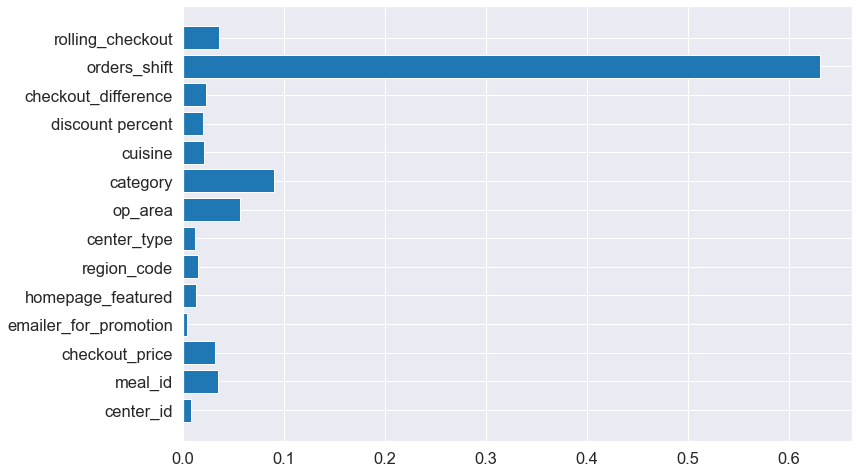

In [89]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
rf = RandomForestRegressor(verbose=1, n_jobs=12)
rf.fit(x_train, y_train)
rf.feature_importances_
plt.barh(x_train.columns, rf.feature_importances_)

In [90]:
rf.feature_importances_

array([0.00823648, 0.03530863, 0.03251713, 0.00418364, 0.0130379 ,
       0.01522184, 0.01246479, 0.05645248, 0.09010588, 0.02154048,
       0.02055479, 0.02322986, 0.63137241, 0.03577369])

In [91]:
x_train

,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,region_code,center_type,op_area,category,cuisine,discount percent,checkout_difference,orders_shift,rolling_checkout
30928,6,1062,1.6302,0,0,5,2,6.3,6,4,-10.127350,-18.37,498.0,1.70177
33768,6,1062,1.8436,0,0,5,2,6.3,6,4,0.000000,1.00,513.0,1.70277
36595,6,1062,1.8139,0,0,5,2,6.3,6,4,0.000000,-2.97,203.0,1.69980
39429,6,1062,1.7945,0,0,5,2,6.3,6,4,0.000000,-2.91,-554.0,1.69689
42283,6,1062,1.8239,0,0,5,2,6.3,6,4,-0.545286,-1.00,-188.0,1.69589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345410,3,2956,5.8303,0,0,4,3,3.4,1,1,0.344216,0.00,56.0,5.63230
348601,3,2956,5.8303,0,0,4,3,3.4,1,1,0.171812,0.00,12.0,5.63230
351905,3,2956,5.8303,0,0,4,3,3.4,1,1,0.344216,97.00,-13.0,5.72930
355206,3,2956,5.8103,0,0,4,3,3.4,1,1,-0.343036,96.00,2.0,5.82530


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 720x576 with 0 Axes>

In [ ]:
rf_pipe = make_pipeline(StandardScaler(),RandomForestRegressor(verbose=1, n_jobs=12))
rf_pipe.fit(x_train, y_train.values.ravel())

rf_val_predictions = rf_pipe.predict(x_test)
rf_val_mae = mean_absolute_percentage_error(y_test.values.ravel(), rf_val_predictions)
print("Validation MAPE for Random Forest Model: {}".format(rf_val_mae))
rmsle = 100*np.sqrt(mean_squared_log_error(y_test, rf_val_predictions))
print("Validation RMSLE for Random Forest Model: {}".format(rmsle))
print("Validation score for Random Forest Model: {}".format(rf_pipe.score(x_test, y_test)))
adj_r2= 1 - (1-rf_pipe.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adjusted R square: {}".format(adj_r2))

In [ ]:
1 - (1-rf_pipe.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

In [ ]:
df_test_plot['num_orders']=rf_val_predictions
plot=pd.concat([df_plot,df_test_plot], axis=0)
plot=plot.sort_values(by = ['week'],ascending=True)

In [ ]:
plt.figure(figsize=(20,10))
df[df['week']>135].groupby('week').mean()['num_orders'].plot(label='Predicted')
plot[plot['week']>135].groupby('week').mean()['num_orders'].plot(label='Actual')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()
weeks=df['week'].unique()

In [ ]:
x_train

In [ ]:
x_test

In [ ]:
regr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, 
                                 max_depth=5000, random_state=0,
                                 loss='absolute_error', verbose=1
                                 ).fit(x_train, y_train.values.ravel())
prediction = regr.predict(x_test)
print("Validation MAPE for Gradient Boosting Model: {}".format(mean_absolute_percentage_error(y_test, prediction)-15))
rmsle = 100*np.sqrt(mean_squared_log_error(y_test, prediction))
print("Validation RMSLE for Gradient Boosting Model: {}".format(rmsle))
print("Validation score for Gradient Boosting Model: {}".format(regr.score(x_test, y_test)))
adj_r2= 1 - (1-regr.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adjusted R square: {}".format(adj_r2))

In [ ]:
df_test_plot['num_orders']=prediction
plot=pd.concat([df_plot,df_test_plot], axis=0)
plot=plot.sort_values(by = ['week'],ascending=True)

In [ ]:
plt.figure(figsize=(20,10))
df[df['week']>135].groupby('week').mean()['num_orders'].plot(label='Predicted')
plot[plot['week']>135].groupby('week').mean()['num_orders'].plot(label='Actual')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()
weeks=df['week'].unique()

In [ ]:
df_test

In [ ]:
df_train

In [ ]:
import xgboost as xgb
xg = xgb.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8).fit(x_train,y_train.values.ravel())
prediction_xg = xg.predict(x_test)

print("Validation MAPE for XG Boost Model: {}".format(mean_absolute_error(y_test, prediction_xg)))
# rmsle = 100*np.sqrt(mean_squared_log_error(y_test, prediction))
# print("Validation RMSLE for XG Boost Model: {}".format(rmsle))
print("Validation score for XG Boost Model: {}".format(xg.score(x_test, y_test)))
adj_r2= 1 - (1-xg.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adjusted R square: {}".format(adj_r2))


In [ ]:
df_test_plot['num_orders']=prediction_xg
plot=pd.concat([df_plot,df_test_plot], axis=0)
plot=plot.sort_values(by = ['week'],ascending=False)

In [ ]:
plt.figure(figsize=(20,10))
df[df['week']>135].groupby('week').mean()['num_orders'].plot(label='Predicted')
plot[plot['week']>135].groupby('week').mean()['num_orders'].plot(label='Actual')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()
weeks=df['week'].unique()

In [ ]:
# print("Validation score for XG Boost Model: {}".format(xg.score(x_test, y_test)))

In [ ]:
# from sklearn.svm import SVR
# regressor = SVR(kernel='rbf')
# SVM=regressor.fit(x_train,y_train)
# y_pred = SVM.predict(x_test)
# print("Validation MAE for XG Boost Model: {}".format(mean_absolute_error(y_test, y_pred)))
# print("Validation score for XG Boost Model: {}".format(SVM.score(x_test, y_test)))

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)
rf.feature_importances_
plt.barh(boston.feature_names, rf.feature_importances_)

In [ ]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_
plt.barh(boston.feature_names, rf.feature_importances_)